In [46]:
from rdkit import Chem


def split_into_residues(m) -> list[Chem.Mol]:
    """Split along any bond between different residues
    
    Residues are defined by a tuple of (chain, resnum, icode, resname)
    """
    def mi_hash(atom):
        monomerinfo = atom.GetMonomerInfo()

        return (
            monomerinfo.GetChainId(),
            monomerinfo.GetResidueNumber(),
            monomerinfo.GetInsertionCode(),
            monomerinfo.GetResidueName(),
        )

    bonds_to_break = []
    for b in m.GetBonds():
        if mi_hash(b.GetBeginAtom()) != mi_hash(b.GetEndAtom()):
            bonds_to_break.append(b.GetIdx())


    broken_m = Chem.rdmolops.FragmentOnBonds(
        m, bonds_to_break, addDummies=True
    )

    residues = Chem.rdmolops.GetMolFrags(broken_m, asMols=True, sanitizeFrags=False)
    
    return residues

In [ ]:
Chem.

In [1]:
m = Chem.MolFromPDBFile('./4E43.pdb')


NameError: name 'Chem' is not defined

In [47]:
split_into_residues(m)

(<rdkit.Chem.rdchem.Mol at 0x124d52dc0>,
 <rdkit.Chem.rdchem.Mol at 0x1245fb6f0>)

In [43]:
Chem.rdDepictor.Compute2DCoords(residues[0])

0

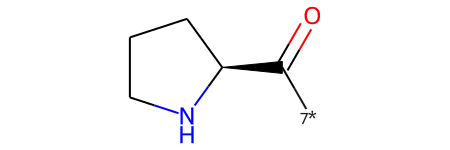

In [44]:
residues[0]

In [45]:
mi_hash(residues[0].GetAtomWithIdx(0))

('A', 1, ' ', 'PRO')

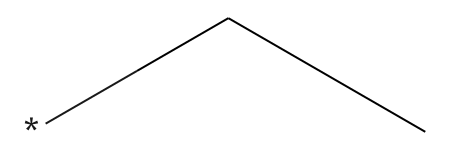

In [16]:
b

In [12]:
adj = Chem.rdmolops.AdjustQueryParameters()

adj.makeAtomsGeneric = True

In [ ]:
adj.

In [14]:
q = Chem.AdjustQueryProperties(q, adj)

In [15]:
q.GetAtomWithIdx(0).GetAtomicNum()

0